### **IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Assignments

/content/drive/My Drive/Assignments


In [4]:
%ls

candy.csv  housing.csv


In [6]:
housing = 'housing.csv'

### **UNI-VARIATE ANALYSIS**

In [7]:
housing_data = pd.read_csv(housing)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
#Total bedroom has some missing or null values in it

In [10]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#there are 207 null values in total_bedroom

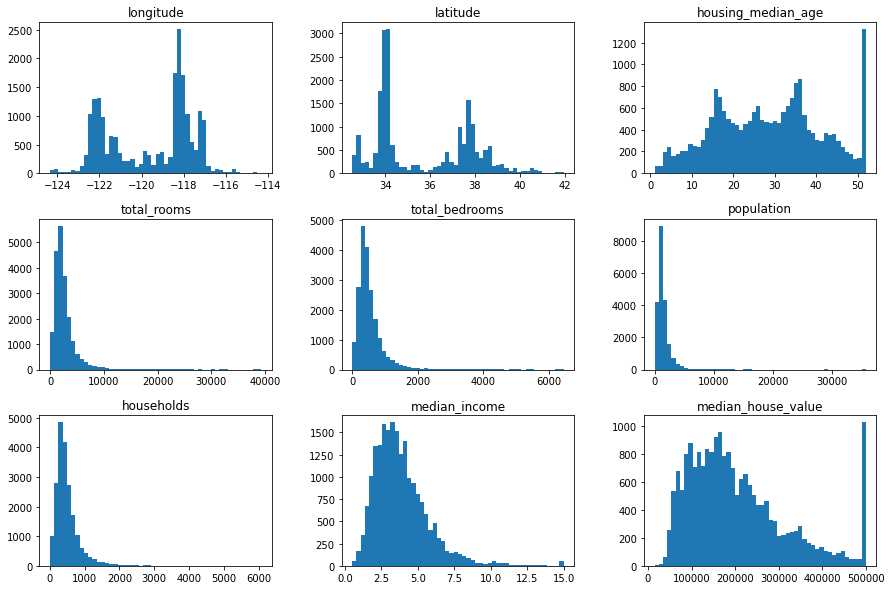

In [12]:
housing_data.hist(bins=50, figsize=(15,10), grid=False)
plt.show()

### **NULL VALUE TREATMENT**

In [13]:
cleanTbl = housing_data.copy()
cleanTbl.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
#replace all null value with the mean value

MeanValue = cleanTbl["total_bedrooms"].mean()
cleanTbl["total_bedrooms"].fillna(MeanValue)
cleanTbl.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


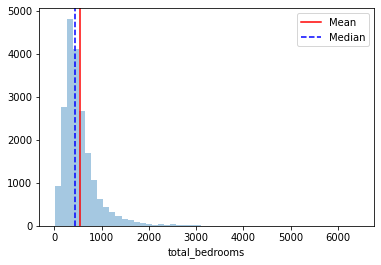

In [15]:
# Trying to plot mean and median line in the histogram

#Assigning total bedrooms to a variable x
x=cleanTbl['total_bedrooms']

#storing distribution plot in ax
ax = sns.distplot(x, kde=False)

#setting the vertical lines for mean and median
ax.axvline(x.mean(), color='r', linestyle='-')
ax.axvline(x.median(), color='b', linestyle='--')

#adding legend
plt.legend({'Mean':x.mean(),'Median':x.median()})

plt.show()


### **BI-VARIATE ANALYSIS**

In [16]:
# Lets do a bi variate analysis with both categorical and numerical data to see if there is trend
# Plotting the ocean proximity and population

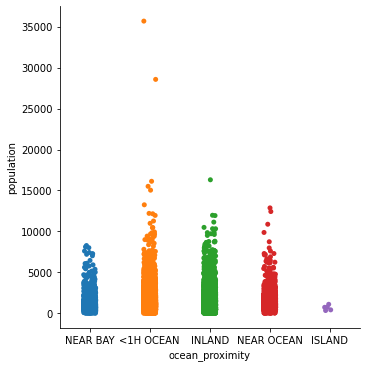

In [17]:
g = sns.catplot(x="ocean_proximity", y="population", data=housing_data)

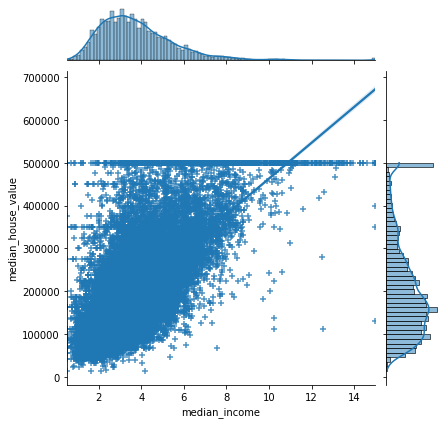

In [18]:
sns.jointplot(data=housing_data, x="median_income", y="median_house_value", kind="reg", marker="+")

### **MULTI-VARIATE ANALYSIS**

In [19]:
# Performing Multi variate analysis to see if there are any treds or patterns that can be identified

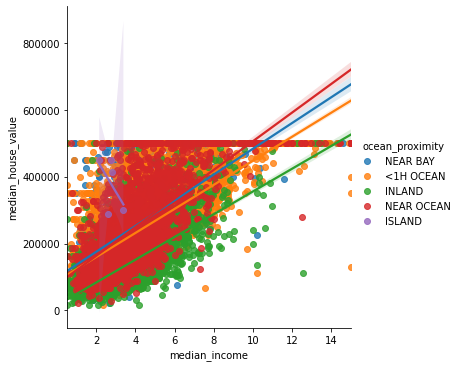

In [20]:
sns.lmplot(x="median_income", y="median_house_value", data=housing_data, hue="ocean_proximity" )

In [21]:
# As we saw in the bi-variate analysis that there is strong correlation between Income and House value. 
# I have tried including a there dimention to see if we can get any insights
# I have take Ocen proximity as my 3rd dimention and it is clear that the house value near the ocean is higher compared to the one which are in near bay, inland, island & <1h ocean

### **FEATURE REDUCTION**

In [22]:
#  removing longitude and latitude from the table as 
#  this wont contribute much for the analysis now

stage = housing_data.drop(['longitude', 'latitude'], axis=1)
stage.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **NEW FEATURE GENERATION**

In [23]:

housing_data.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [24]:
#Getting unique values of ocean proximity and store it in a variable proximity
proximity = housing_data.ocean_proximity.unique()
proximity

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
#creating new columns and adding a default value 

In [26]:
stage['NEAR BAY'] = '0'
stage['<1H OCEAN'] = '0'
stage['INLAND'] = '0'
stage['NEAR OCEAN'] = '0'
stage['ISLAND'] = '0'
stage.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,0,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,0,0
